In [5]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

%matplotlib inline

## `eigsort.m`

In [ ]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002

In [1]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

## `viewcolumn.m`

In [3]:
# viewcolumn(columnvector);
# VIEWCOLUMN Displays a 60 x 60 grayscale image stored in a column vector.
# Tim Marks 2002

def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([60, 60], order='F'), cmap=plt.get_cmap('gray'))

In [2]:
# normc(M) normalizes the columns of M to a length of 1.

def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

## Load .mat files

In [93]:
hw4data = np.loadtxt('hw4data.mat')

### B

#### 1

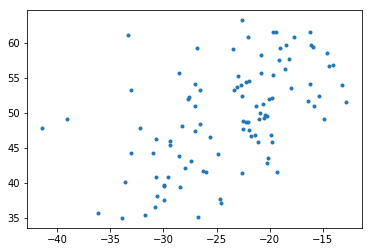

In [43]:
plt.scatter(hw4data[0,:], hw4data[1,:], marker = '.')

#### 2

In [191]:
mean = np.matrix(np.mean(hw4data, axis = 1)).T
mean

matrix([[-23.78989551],
        [ 49.46199088]])

#### 3

In [192]:
Z = np.zeros(hw4data.shape)
Z[0,:] = hw4data[0,:] - mean[0]
Z[1,:] = hw4data[1,:] - mean[1]

In [193]:
cov = Z.dot(Z.T)/100

In [194]:
cov

array([[34.65672591, 22.54958275],
       [22.54958275, 52.00402712]])

### C

#### 1

In [195]:
eigvals, V = np.linalg.eig(cov)

In [196]:
eigvals

array([19.17016342, 67.49058962])

In [197]:
V

array([[-0.82431958, -0.56612474],
       [ 0.56612474, -0.82431958]])

#### 2

The eigenvector corresponding to the largest eigenvalue is [-0.5661, -0.8243]

#### 3

The eigenvector corresponding to the smallest eigenvalue is [-0.8243, 0.5661]

#### 4

In [198]:
Vsort, Dsort = eigsort(V, eigvals)

In [199]:
Vsort

array([[-0.56612474, -0.82431958],
       [-0.82431958,  0.56612474]])

In [200]:
Dsort

array([[67.49058962,  0.        ],
       [ 0.        , 19.17016342]])

#### 5

The sorted eigenvector will move the eigenvector that corresponds to the largest eigenvalue to the left and move the eigenvector that corresponds to the smallest eigenvalue to the right.

### D

#### 1

In [201]:
point = np.array([-35, 40])

In [204]:
c = Vsort.T.dot(np.matrix(point).T - mean)

In [205]:
c

matrix([[14.1460219 ],
        [ 3.88404151]])

The new coordinate is [14.146, 3.88]

#### 2

In [206]:
C = Vsort.T.dot(Z)

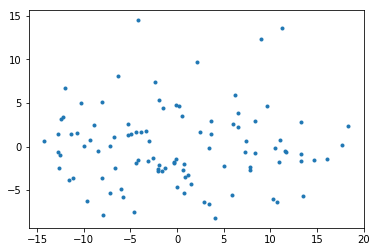

In [207]:
plt.scatter(C[0,:], C[1,:], marker = '.')

#### 3

hw4d.jpg is the result of demeaning and rotating hw4b.jpg. The x-axis in hw4d.jpg is the first principle component of hw4b.jpg, which is the line in hw4b.jpg that shows the greatest variance, while the y-axis in hw4d.jpg is the second principle component of hw4b.jpg. The data points are also centered around 0 in hw4d.jpg compared to hw4b.jpg as we subtract the mean from each data point.

### E

In [94]:
hw4bdata = sio.loadmat('hw4bdata.mat')
faces = hw4bdata['faces']
dog = hw4bdata['dog']
x = hw4bdata['x']

#### 1

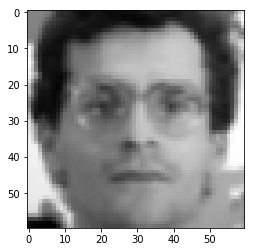

In [97]:
viewcolumn(faces[:,4])

#### 2

In [105]:
mean_face = np.mean(faces, axis = 1).reshape(-1, 1)

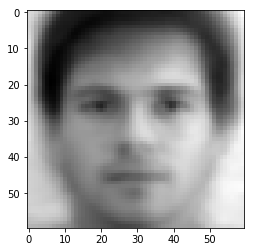

In [106]:
viewcolumn(mean_face)

#### 3

In [107]:
A = faces - repmat(mean_face, 1, 48)

In [109]:
A

array([[-0.1279409 , -0.1632349 , -0.3240199 , ..., -0.4534309 ,
        -0.3553919 , -0.4691179 ],
       [-0.13627452, -0.15980352, -0.32058852, ..., -0.45392152,
        -0.33627452, -0.48137252],
       [-0.15498323, -0.15890523, -0.31576823, ..., -0.44517923,
        -0.33537623, -0.48047423],
       ...,
       [ 0.17352923, -0.09705877, -0.14411777, ...,  0.22451023,
         0.15000023,  0.07941223],
       [ 0.1753265 , -0.0952615 , -0.1423205 , ...,  0.2380715 ,
         0.1753265 ,  0.1831695 ],
       [ 0.18284348, -0.07990152, -0.13088252, ...,  0.24950948,
         0.26519648,  0.15147048]])

#### 4

In [157]:
eigface, Vface = np.linalg.eig(A.T.dot(A))

In [110]:
eigface

array([7.89353963e+02, 7.50372015e+02, 6.13356713e+02, 3.70983563e+02,
       2.68201564e+02, 2.36361084e+02, 1.70029619e+02, 1.49860836e+02,
       1.18801968e+02, 1.10914682e+02, 9.14497473e+01, 7.52341911e+01,
       7.34147448e+01, 6.09998901e+01, 5.53437303e+01, 5.06087799e+01,
       4.08117997e+01, 3.68984176e+01, 3.53593510e+01, 3.18205951e+01,
       3.13378723e+01, 2.68589679e+01, 2.50358844e+01, 2.40314381e+01,
       2.22542645e+01, 8.55313390e-15, 1.90015079e+01, 1.81003324e+01,
       1.62311549e+01, 1.58640534e+01, 1.43929896e+01, 1.41263942e+01,
       1.30955353e+01, 1.21975518e+01, 3.81472080e+00, 1.04138034e+01,
       1.00183599e+01, 4.39755386e+00, 4.59851307e+00, 9.13501506e+00,
       8.42714980e+00, 7.88882893e+00, 7.49093631e+00, 5.31928453e+00,
       5.73939357e+00, 5.88801674e+00, 6.89981233e+00, 6.51177958e+00])

In [111]:
Vface

array([[-0.19265984, -0.1830301 , -0.11348434, ...,  0.08528926,
        -0.02176483,  0.04586308],
       [ 0.00377213, -0.15043242, -0.01058058, ..., -0.0718693 ,
        -0.17198674, -0.03218835],
       [ 0.16637901, -0.15410461, -0.06556934, ..., -0.00174778,
         0.2308182 , -0.03720141],
       ...,
       [-0.03511596,  0.00703444, -0.21001494, ..., -0.0754946 ,
        -0.15995244, -0.04311707],
       [ 0.0921988 , -0.00602547, -0.0994964 , ...,  0.08025563,
        -0.07935972,  0.0253342 ],
       [ 0.18679792, -0.01075859, -0.19809639, ..., -0.0765196 ,
         0.11275185,  0.03140248]])

#### 5

In [158]:
V, Dsort = eigsort(Vface, eigface)

#### 6

In [159]:
U = A.dot(V)

#### 7

In [160]:
U = normc(U)

### F

In [161]:
c = U.T.dot(A[:,4])

In [162]:
c

array([ 0.59484222,  2.64302744,  4.28750144, -0.09430205,  2.01486472,
        0.04852224, -1.76066402, -0.52431502,  0.30971453, -1.89363715,
        1.47983678,  0.7304473 , -0.04236052,  1.7440304 , -0.63307755,
        0.79165262, -1.63643344,  0.07917033,  1.44050643, -0.94581072,
        1.55134294,  0.557355  ,  0.885248  , -0.10029066,  0.67712303,
       -0.47950991, -0.38748201, -0.21086912, -0.15472892, -0.22071231,
       -0.47643924, -0.03943703, -0.25526821,  0.32911967,  0.1442234 ,
       -0.50016675, -0.14832188, -0.51684907, -0.01793294, -0.28125184,
       -0.05827041, -0.52265902,  0.65061262, -0.14567199,  0.18304715,
        0.9358698 ,  0.18247778, -0.03947092])

### G

#### 1

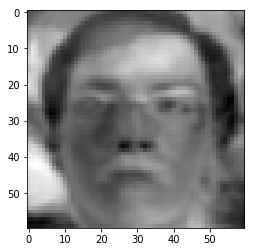

In [163]:
viewcolumn(U[:,2])

#### 2

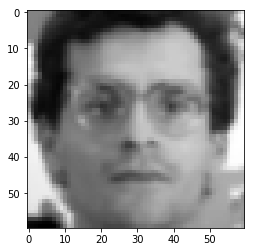

In [164]:
viewcolumn(U.dot(c) + mean_face.T)

#### 3

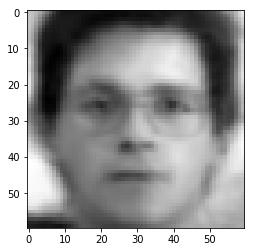

In [166]:
viewcolumn(U[:, :10].dot(U[:,:10].T.dot(A[:, 4])) + mean_face.reshape(1,-1))

### H

#### 1

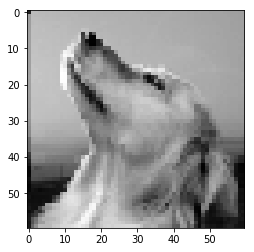

In [167]:
viewcolumn(dog)

#### 2

In [169]:
c = U.T.dot(dog - mean_face)

#### 3

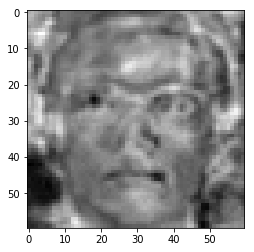

In [170]:
viewcolumn(U.dot(c) + mean_face.reshape(-1,1))

#### 4

The reconstructed image doesn't look like the original dog image, this is because we shouldn't apply data of faces to an image of dog as dogs do not look like human faces.

### I

#### 1

In [187]:
newfaces = np.delete(faces,np.s_[6:9],axis=1)
mean_face = np.mean(newfaces, axis = 1).reshape(-1,1)
A = newfaces - repmat(mean_face, 1, 45)
Dold, Vold = np.linalg.eig(A.T.dot(A))
V, D = eigsort(Vold, Dold)
U = normc(A.dot(V))


#### 2

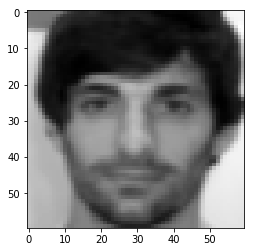

In [188]:
viewcolumn(faces[:,6])

#### 3

In [189]:
c = U.T.dot(faces[:, 6].reshape(-1,1) - mean_face)
zhat = U.dot(c) + mean_face.reshape(-1,1)

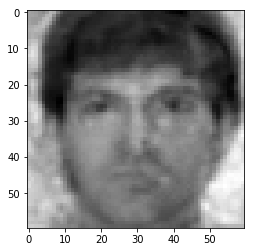

In [190]:
viewcolumn(zhat)

#### 4

The face space does not represent well this third person that I excluded from the origianl data set. This might be because that the original data set is not large enough to capture the the features of this person excluded in its mean face matrix.